In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
img_shape = (224, 224, 3)
gz1_model = load_model('D:/OneDrive/Major Project/Code/Galaxy_Morphology/Data/GalaxyZoo1/weights/GZ1_TL_Grayscale.hdf5')

In [3]:
print(gz1_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 37)                3713061   
                                                                 
Total params: 27,300,773
Trainable params: 3,713,061
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [4]:
classes = [
    'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1',
    'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3',
    'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3',
    'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6',
    'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1', 'Class10.2',
    'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3', 'Class11.4',
    'Class11.5', 'Class11.6'
] #37 vectors of Galaxy Zoo divided into 11 classes based on the 11 different questions and their responses


def append_ext(fn):
    '''
    This function is used to take the GalaxyID from the CSV and append .jpg to it in order to denote the image names. 
    '''
    return fn + ".jpg"

traindf = pd.read_csv(os.path.join(r"D:\OneDrive\Major Project\Code\Galaxy_Morphology\Data\GalaxyZoo2", 'GZ_2_Processed_classes.csv')) #Read the Data Frame using pandas

traindf["id"] = traindf['GalaxyID'].astype(str).apply(append_ext) #Create a new column in the Data Frame called 'id' which has the image names.
traindf

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,id
0,55934,0.780,0.139,0.081,0.000000,1.000000,0.400000,0.600190,0.000000,1.000000,...,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,55934.jpg
1,158501,0.036,0.964,0.000,0.036974,0.963112,0.038000,0.962028,0.962366,0.038012,...,0.640306,0.319844,0.04,0.0,0.079018,0.240087,0.200076,0.241322,0.239765,158501.jpg
2,110939,0.767,0.186,0.047,0.125182,0.878825,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,110939.jpg
3,249897,0.861,0.063,0.076,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,249897.jpg
4,71801,0.649,0.286,0.065,0.265277,0.730913,0.257785,0.750579,0.000000,1.000000,...,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,71801.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203828,262969,0.823,0.174,0.003,0.857000,0.143000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,262969.jpg
203829,275883,0.541,0.263,0.197,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,275883.jpg
203830,282536,0.789,0.156,0.055,0.000000,1.000000,0.143000,0.857000,0.286000,0.714000,...,0.500000,0.500000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,282536.jpg
203831,284172,0.531,0.278,0.191,0.000000,1.000000,0.000000,1.000000,0.076000,0.924000,...,1.000000,0.000000,0.00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,284172.jpg


In [5]:
def convert_rgb_to_grayscale(image):
    return tf.image.rgb_to_grayscale(image)

datagenerator = ImageDataGenerator(
    fill_mode='nearest',
    cval=0,
    rescale=1/255,
    preprocessing_function=convert_rgb_to_grayscale,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.02)

train_generator = datagenerator.flow_from_dataframe(
    dataframe=traindf,
    directory="D:/OneDrive/Major Project/Code/Galaxy_Morphology/Data/GalaxyZoo2/images_gz2/images",
    x_col="id",
    y_col=classes,
    subset="training",
    batch_size=16,
    seed=123,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224))

validation_generator = datagenerator.flow_from_dataframe(
    dataframe=traindf,
    directory="D:/OneDrive/Major Project/Code/Galaxy_Morphology/Data/GalaxyZoo2/images_gz2/images",
    x_col="id",
    y_col=classes,
    subset="validation",
    batch_size=16,
    seed=123,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224))

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size

D:\anaconda\envs\majorproject\lib\site-packages\keras\preprocessing\image.py:1267: UserWarning: Found 108 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


Found 199651 validated image filenames.
Found 4074 validated image filenames.


D:\anaconda\envs\majorproject\lib\site-packages\keras\preprocessing\image.py:1267: UserWarning: Found 108 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


In [6]:
print(gz1_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 37)                3713061   
                                                                 
Total params: 27,300,773
Trainable params: 3,713,061
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [7]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, decay=5e-4)

gz1_model.compile(optimizer, loss='mse', metrics=["accuracy"])

In [8]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))


early_stopping = EarlyStopping(
    monitor='val_loss', patience=4, verbose=1, mode='auto')

history = LossHistory()

checkpointer = ModelCheckpoint(
    filepath='D:/OneDrive/Major Project/Code/Galaxy_Morphology/Data/GalaxyZoo2/model/GZ2_IL.hdf5', verbose=2, save_best_only=True)

In [9]:
hist = gz1_model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=30,
    callbacks=[history, checkpointer, early_stopping])

Epoch 1/30
12478/12478 [==============================] - ETA: 0s - loss: 0.1806 - accuracy: 0.0093
Epoch 1: val_loss improved from inf to 0.17330, saving model to D:/OneDrive/Major Project/Code/Galaxy_Morphology/Data/GalaxyZoo2/model\GZ2_IL.hdf5
12478/12478 [==============================] - 10839s 868ms/step - loss: 0.1806 - accuracy: 0.0093 - val_loss: 0.1733 - val_accuracy: 0.0059
Epoch 2/30
12478/12478 [==============================] - ETA: 0s - loss: 0.1806 - accuracy: 0.0093
Epoch 2: val_loss improved from 0.17330 to 0.17329, saving model to D:/OneDrive/Major Project/Code/Galaxy_Morphology/Data/GalaxyZoo2/model\GZ2_IL.hdf5
12478/12478 [==============================] - 5969s 478ms/step - loss: 0.1806 - accuracy: 0.0093 - val_loss: 0.1733 - val_accuracy: 0.0059
Epoch 3/30
12478/12478 [==============================] - ETA: 0s - loss: 0.1806 - accuracy: 0.0093
Epoch 3: val_loss did not improve from 0.17329
12478/12478 [==============================] - 7178s 575ms/step - loss: 0.

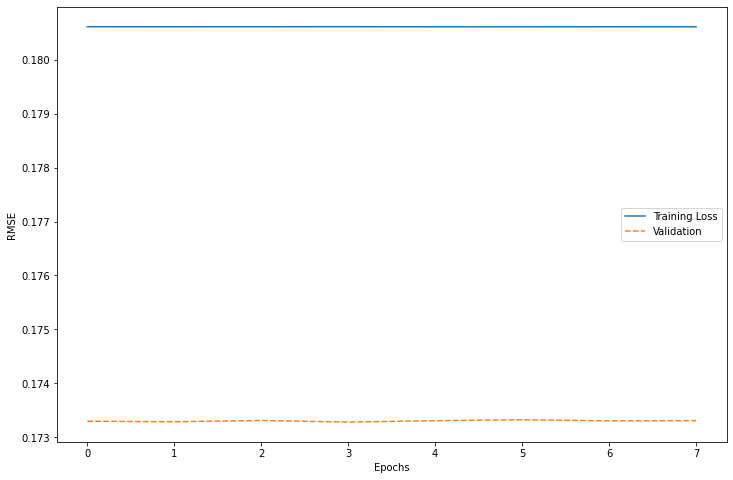

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(hist.epoch, hist.history['loss'], label='Training Loss')
plt.plot(
    hist.epoch, hist.history['val_loss'], label='Validation', linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()
plt.show()